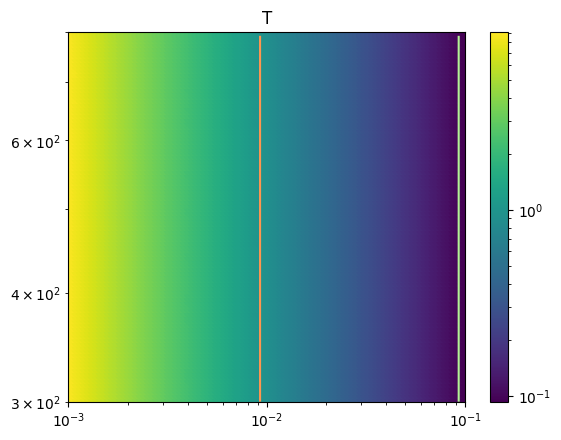

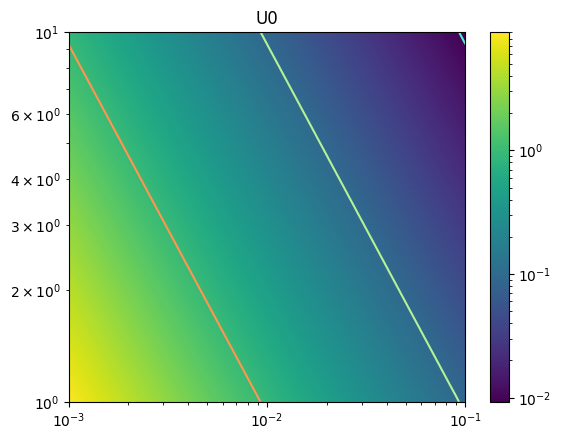

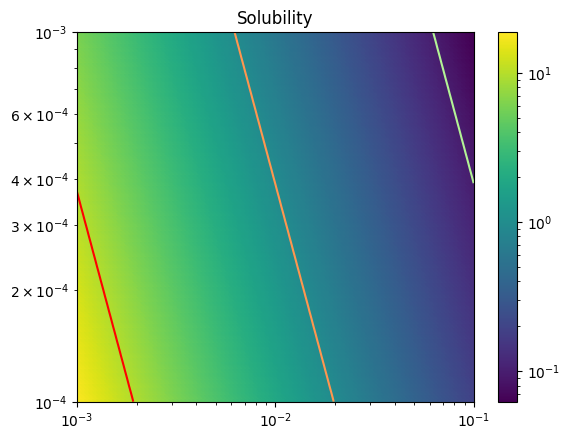

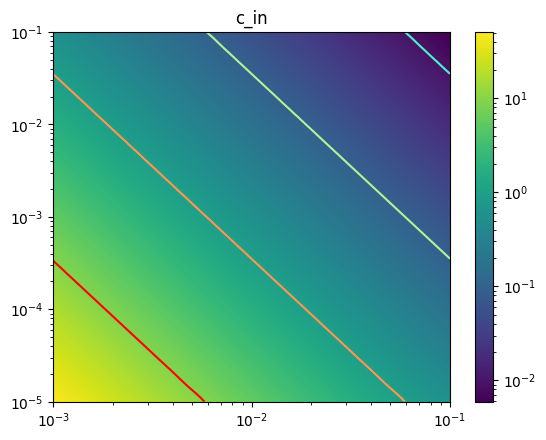

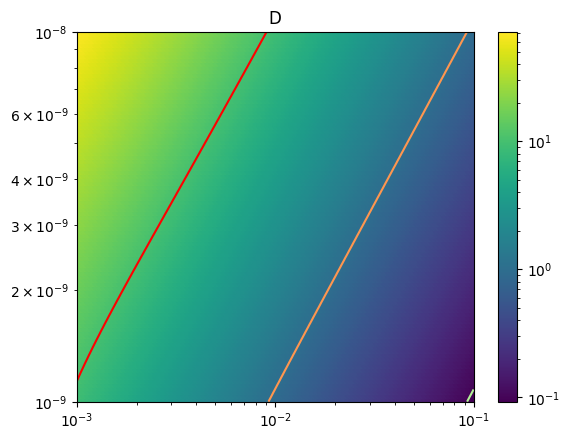

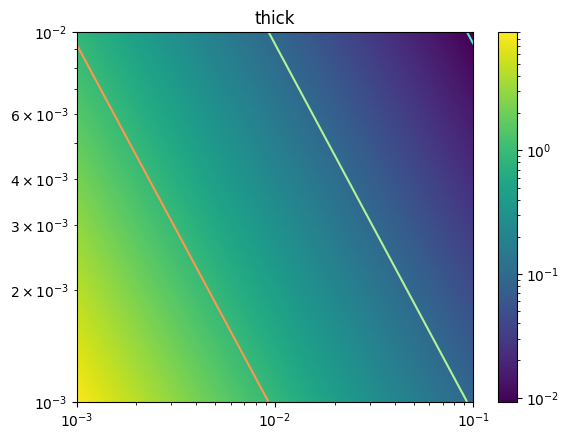

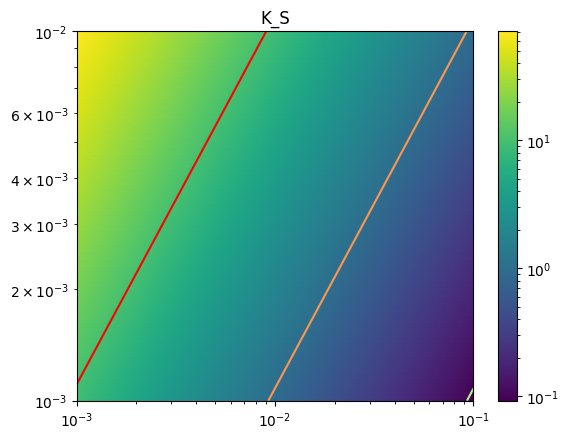

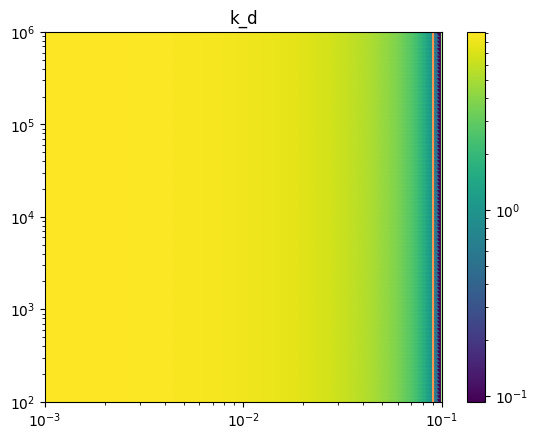

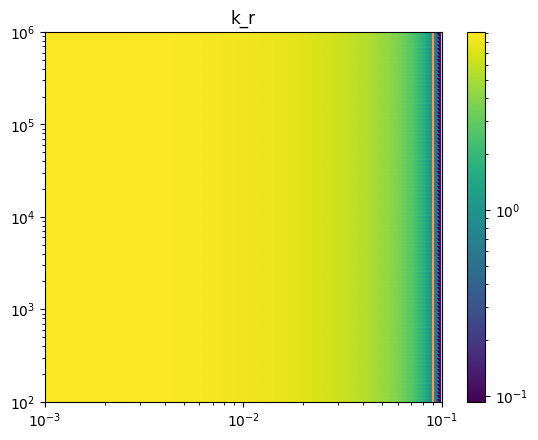

In [10]:
import numpy as np 
from tools.component_tools import Component
from tools.component_tools import Fluid
from tools.component_tools import Membrane
from tools.component_tools import GLC_Gas
from tools.component_tools import GLC 
from tools.materials import Flibe 
import tools.materials as materials
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

d_hyd_v=np.logspace(-3,-1,100)
T_vec=np.linspace(300,800,30)
U0_vec=np.logspace(0,1,30)
str_v_vec=['T','U0','Solubility','c_in',"D","thick","K_S","k_d","k_r"]
c_in_vec=np.logspace(-5,-1,30)
D_vec=np.logspace(-9,-8,30)
thick_vec=np.logspace(-3,-2,30)
K_S_vec=np.logspace(-3,-2,30)
k_d_vec=np.logspace(2,6,30)
k_r_vec=np.logspace(2,6,30)
solubility_vec=np.logspace(-4,-3,30)
v_vec=np.array([T_vec, U0_vec, solubility_vec, c_in_vec, D_vec, thick_vec, K_S_vec])
eff_v_vec=np.array([])
fluid_v_bool=np.array([True , True , True ,False,False,False,False,False,False])
solid_v_bool=np.array([False, False, False,False,True ,True ,True ,True ,True ])

  
for j,vec in enumerate(v_vec):
        eff_v=np.array([])
        var_str=str_v_vec[j]
        T=800
        res_vec=np.array([])
        d_hyd_v_res=np.array([])
        var_vec=np.array([])
        for var in vec:
                for i,d_hyd in enumerate(d_hyd_v):
                        if str_v_vec[j]=='T':
                                T=var
                                #print(T)
                        c0=4.1E-4
                        mat=materials.Flibe(T)
                        
                        flibe=Fluid(T=T, Solubility=mat.Solubility, MS=True,D=mat.D, d_Hyd=d_hyd ,mu=mat.mu,rho=mat.rho,U0=1, c0=c0)
                        Steel = Membrane( T=T,
                                D=1E-9,
                                thick=1E-3,
                                K_S=1E-3,
                                k_d=1E6,
                                k_r=1E6)
                        PAV = Component(c_in=c0, eff=0.5, fluid=flibe, membrane=Steel)
                        if fluid_v_bool[j]==True:
                                PAV.fluid.update_attribute(var_str,var)
                        elif solid_v_bool[j]==True:
                                PAV.membrane.update_attribute(var_str,var)
                        else:
                                PAV.update_attribute(var_str,var)
                        HX=Component(c_in=PAV.outlet_c_comp(), eff=0.08, fluid=flibe)
                        PAV.get_adimensionals()
                        PAV.get_efficiency(20,plotvar=False)
                        out_flux=(PAV.c_in*(1-PAV.eff)*PAV.fluid.U0*PAV.fluid.d_Hyd**2/4)
                        eff_v=np.append(eff_v, PAV.eff)
                        d_hyd_v_res=np.append(d_hyd_v_res, d_hyd)
                        var_vec=np.append(var_vec, var)
                        res_vec=np.append(res_vec, PAV.eff)
                        
                eff_v_vec=np.append(eff_v_vec, eff_v)
        plt.figure(j)
        plt.title(str_v_vec[j])
        
        x = np.logspace(np.log10(min(d_hyd_v_res[:])), np.log10(max(d_hyd_v_res[:])), num=100)
        y = np.logspace(np.log10(min(var_vec[:])), np.log10(max(var_vec[:])), num=100)
        X, Y = np.meshgrid(x, y)
        plt.yscale('log')
        plt.xscale('log')
        Z = griddata((d_hyd_v_res, var_vec), (1-res_vec)*100, (X, Y), method='cubic')
        #plt.contour(X, Y, Z, levels=[0.95,0.99,0.9999], colors=['k','r','b'])
        plt.contour(X, Y, Z, levels=[1E-4,1E-3,1E-2,1E-1,1,10],norm=LogNorm(), cmap='rainbow')
        plt.scatter(X,Y, c=Z ,norm=colors.LogNorm()) #,norm=colors.LogNorm()
        plt.colorbar()  # Show color scale
        plt.show()

Jupyter notebook to test and run features of components in a FPP

In [11]:
print(PAV.fluid.Solubility)

0.000454
